In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SAGanjarDroneGantrung.csv")

In [3]:
# Ubah kolom tanggal ke tipe data datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Ubah format tanggal
df['created_at'] = df['created_at'].dt.strftime('%d-%m-%Y')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27788\373423951.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


In [4]:
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,sentiment
0,09-10-2023,1.710000e+18,@__AnakKolong @iromismet Ganjar siji Ganjar ka...,0,3,4,12,in,8.830000e+17,1.710000e+18,AbuNawa48105494,https://twitter.com/AbuNawa48105494/status/171...,positive
1,09-10-2023,1.710000e+18,@PowerInvestindo @BangPakat Dan pak ganjar Wap...,0,2,0,0,in,1.600000e+18,1.710000e+18,SitiMua98339951,https://twitter.com/SitiMua98339951/status/171...,positive
2,09-10-2023,1.710000e+18,@ganjarpranowo masyaallah pak ganjar selalu me...,0,0,0,0,in,1.690000e+18,1.710000e+18,tasyaputtrii23,https://twitter.com/tasyaputtrii23/status/1711...,positive
3,09-10-2023,1.710000e+18,@CNNIndonesia Coba itu CSIS yg bikin survey .....,0,0,0,0,in,1.670000e+18,1.710000e+18,DSarastami96477,https://twitter.com/DSarastami96477/status/171...,neutral
4,09-10-2023,1.710000e+18,@aniesbaswedan @cakimiNOW @NasDem @PKSejahtera...,0,0,0,0,in,7.030000e+17,1.710000e+18,GreatMoment_Ch,https://twitter.com/GreatMoment_Ch/status/1711...,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,15-10-2023,1.710000e+18,@IDNTimes Sukses terus bapak Ganjar Pranowo ðŸ...,0,0,0,1,in,1.690000e+18,1.710000e+18,Vinaaa21_,https://twitter.com/Vinaaa21_/status/171341026...,positive
2495,15-10-2023,1.710000e+18,@ganjarpranowo Toleransi pak Ganjar emang ting...,0,0,0,0,in,1.690000e+18,1.710000e+18,Azzahra2347,https://twitter.com/Azzahra2347/status/1713410...,positive
2496,15-10-2023,1.710000e+18,"@gus_dibyo Sangat setuju, pak Ganjar memang le...",0,0,0,1,in,1.480000e+18,1.710000e+18,najataaafrmn,https://twitter.com/najataaafrmn/status/171341...,positive
2497,15-10-2023,1.710000e+18,@ganjarpranowo Menjalin hubungan dengan para u...,0,0,0,0,in,1.700000e+18,1.710000e+18,mufimufi111190,https://twitter.com/mufimufi111190/status/1713...,positive


# **SEBARAN SENTIMEN**

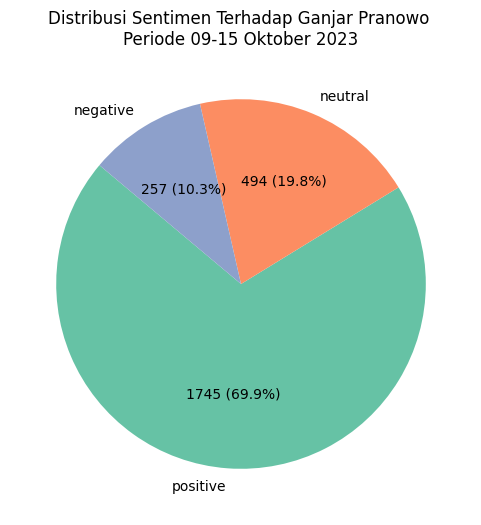

In [5]:
sentimen_counts = df['sentiment'].value_counts()

# Set palet warna menjadi 'Set2'
sns.set_palette('Set2')

# Buat pie chart menggunakan seaborn
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct=lambda p: f'{int(p * sum(sentimen_counts) / 100)} ({p:.1f}%)', startangle=140)

plt.title('Distribusi Sentimen Terhadap Ganjar Pranowo \nPeriode 09-15 Oktober 2023')

# Tampilkan pie chart
plt.show()

In [6]:
sentimen_perDate = df.groupby(['created_at', 'sentiment']).size().unstack(fill_value=0)

Text(0.5, 0, 'Tanggal')

<Figure size 1500x1000 with 0 Axes>

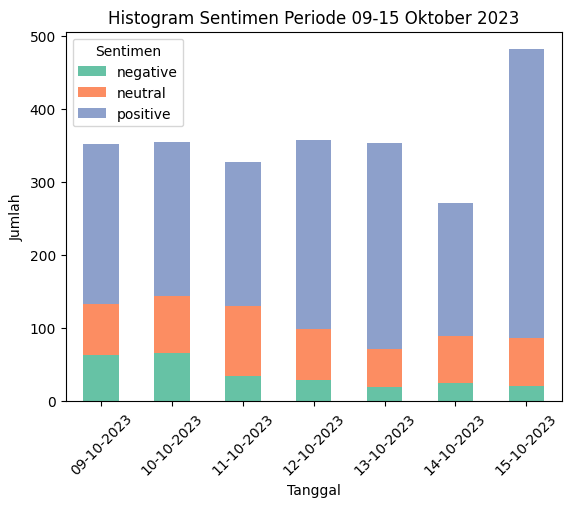

In [7]:
plt.figure(figsize=(15, 10))
sns.set_palette('Set2')
sentimen_perDate.plot(kind='bar', stacked=True)
plt.title('Histogram Sentimen Periode 09-15 Oktober 2023')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Sentimen')

# Menambahkan label pada sumbu X
plt.xlabel('Tanggal')

In [8]:
import re
def extract_hashtags(text):
    # Define a regular expression pattern to match hashtags
    hashtag_pattern = r'#\w+'
    
    # Use the findall method to extract all hashtags from the text
    hashtags = re.findall(hashtag_pattern, text)
    
    return hashtags

# **ISU PERDAY and HASTAGS**

**09-10-2023**

In [9]:
filtered_9 = df[df['created_at'] == '09-10-2023']

In [10]:
filtered_9['hashtags'] = filtered_9['full_text'].apply(extract_hashtags)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27788\2624556777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_9['hashtags'] = filtered_9['full_text'].apply(extract_hashtags)


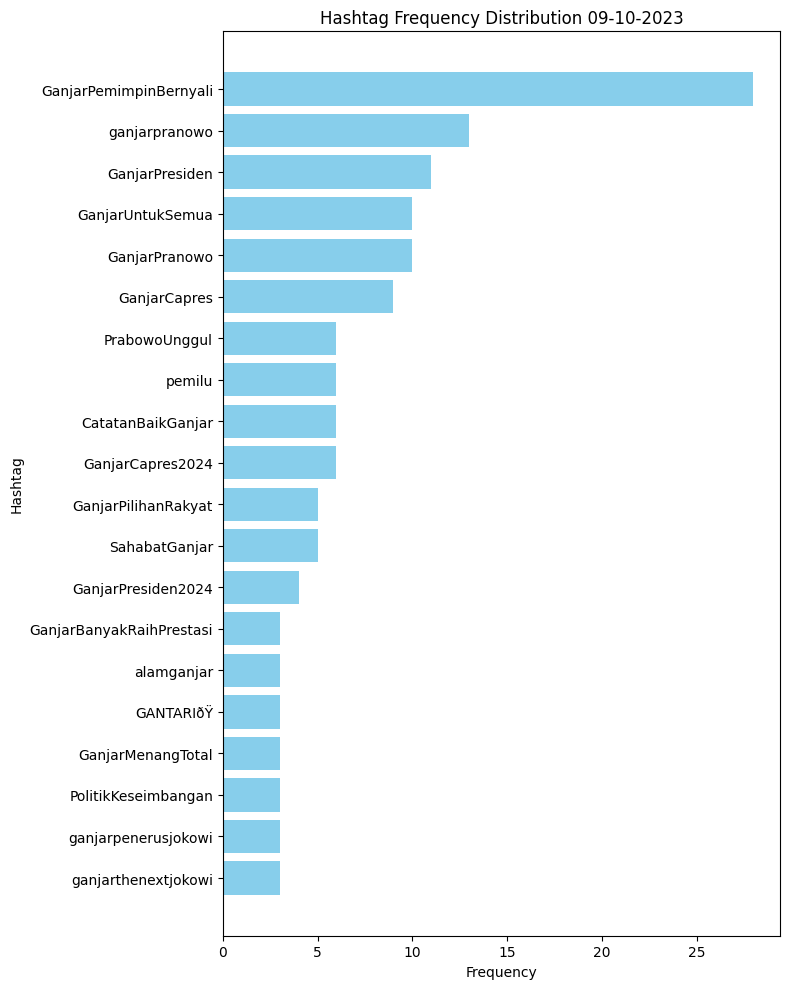

In [11]:
all_hashtags = [hashtag for hashtags in filtered_9['hashtags'] for hashtag in hashtags]

# Calculate hashtag frequencies
hashtag_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_counts.columns = ['Hashtag', 'Frequency']

# Sort by frequency in ascending order
sorted_hashtags = hashtag_counts.sort_values(by='Frequency', ascending=False)

hashtags = sorted_hashtags['Hashtag'].head(20)
frequencies = sorted_hashtags['Frequency'].head(20)


words = [hashtag[1:] for hashtag in hashtags]
# Reverse the order to display the most frequent hashtags at the top
words = words[::-1]
frequencies = frequencies[::-1]

# Create a vertical bar chart with hashtag names on the y-axis
plt.figure(figsize=(8, 10))  # Adjust the figsize to fit your preference
plt.barh(words, frequencies, color='skyblue')
plt.ylabel('Hashtag')
plt.xlabel('Frequency')
plt.title('Hashtag Frequency Distribution 09-10-2023')
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

In [12]:
filtered_9 = filtered_9[filtered_9['favorite_count']>10]

In [13]:
filtered_9 = filtered_9[['full_text','retweet_count','favorite_count','username','tweet_url','sentiment']]

In [14]:
filtered_9

,full_text,retweet_count,favorite_count,username,tweet_url,sentiment
0,@__AnakKolong @iromismet Ganjar siji Ganjar ka...,4,12,AbuNawa48105494,https://twitter.com/AbuNawa48105494/status/171...,positive
31,Foto yang Hilang dari Instagram Ganjar https:/...,28,27,OposisiCerdas,https://twitter.com/OposisiCerdas/status/17115...,neutral
44,"Beginilah cara beliau Bapak @ganjarpranowo, De...",20,33,RizkiR4madani,https://twitter.com/RizkiR4madani/status/17115...,positive
49,Suasana yang asyik tercipta ketika pak Ganjar ...,12,18,JesicaRahmadina,https://twitter.com/JesicaRahmadina/status/171...,positive
51,@papa_loren Yang terlarang bagi PNS kalau like...,18,159,Musramidal67,https://twitter.com/Musramidal67/status/171152...,negative
85,Ganjar Pranowo pemimpin yang dicintai rakyat #...,0,40,GanjarPendukung,https://twitter.com/GanjarPendukung/status/171...,positive
100,Momen para emak-emak di Bandung berkumpul unt...,28,102,muispebrianto,https://twitter.com/muispebrianto/status/17115...,neutral
105,"Kunjungi Tasikmalaya, Bacapres 2024 @ganjarpra...",35,60,B1nt4ng_K1r4r4,https://twitter.com/B1nt4ng_K1r4r4/status/1711...,neutral
119,"Ganjar Bertemu Cucu Syekh Abdul Qadir Jailani,...",16,19,rasa2086,https://twitter.com/rasa2086/status/1711522324...,positive
122,Menginap di Kampung Nagrok Desa Muncang Kec So...,27,78,Ghurem2,https://twitter.com/Ghurem2/status/17115221650...,positive


In [15]:
for text in filtered_9['full_text'][:30]:
  print(text)

@__AnakKolong @iromismet Ganjar siji Ganjar kabeh ðŸ’ª https://t.co/QxNaEjBuPl
Foto yang Hilang dari Instagram Ganjar https://t.co/fSEryJKKYO
Beginilah cara beliau Bapak @ganjarpranowo, Dekat rakyat nye..ðŸ¥°ðŸ¤—â™¥ï¸ðŸ‡²ðŸ‡¨ Terlihat keakraban yang cihuy ðŸ‘ðŸ»â˜•,  dgn warge Kampung Nagrok Desa Muncang Kec Sodonghilir, Kab Tasikmalaya. Makan malam pade tgl (9/10/2023), di kampung Nagrok Desa Muncang Pak Ganjar ditemani warga sekitar. https://t.co/NqtA5mbSwf
Suasana yang asyik tercipta ketika pak Ganjar Pranowo menginap di rumah warga, yang kali ini dilakukan di Kampung Nagrok, Desa Muncang, Kec Sodonghilir, Kab Tasikmalaya. Selain ngariung dan makan malam bersama, pak @ganjarpranowo bersama warga nampak ngobrol dalam suasana akrab. https://t.co/AV1aBURYxh
@papa_loren Yang terlarang bagi PNS kalau like and share, tapi ikut kampanye Ganjar boleh bahkan pasang foto Ganjar di mobil dinas juga gapapa
Ganjar Pranowo pemimpin yang dicintai rakyat #GanjarCapres #ganjarpranowo #pemilu #Gan

**10-10-2023**

In [16]:
filtered_10 = df[df['created_at'] == '10-10-2023']

In [17]:
filtered_10['hashtags'] = filtered_10['full_text'].apply(extract_hashtags)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27788\1107119886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_10['hashtags'] = filtered_10['full_text'].apply(extract_hashtags)


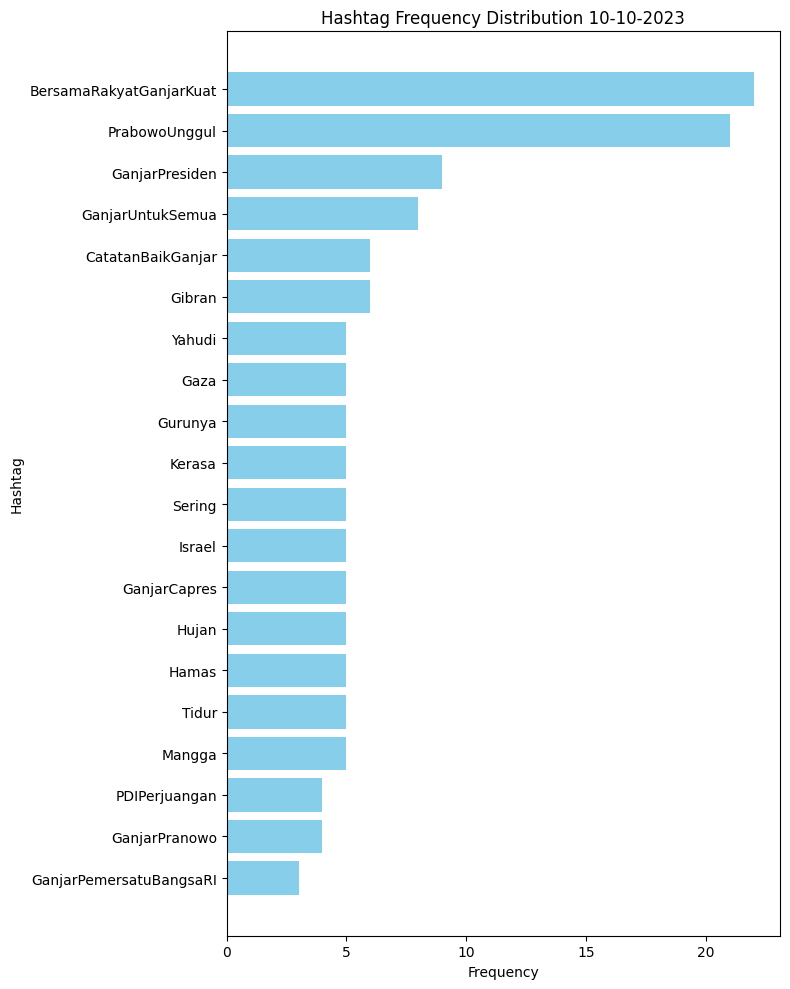

In [18]:
all_hashtags = [hashtag for hashtags in filtered_10['hashtags'] for hashtag in hashtags]

# Calculate hashtag frequencies
hashtag_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_counts.columns = ['Hashtag', 'Frequency']

# Sort by frequency in ascending order
sorted_hashtags = hashtag_counts.sort_values(by='Frequency', ascending=False)

hashtags = sorted_hashtags['Hashtag'].head(20)
frequencies = sorted_hashtags['Frequency'].head(20)


words = [hashtag[1:] for hashtag in hashtags]
# Reverse the order to display the most frequent hashtags at the top
words = words[::-1]
frequencies = frequencies[::-1]

# Create a vertical bar chart with hashtag names on the y-axis
plt.figure(figsize=(8, 10))  # Adjust the figsize to fit your preference
plt.barh(words, frequencies, color='skyblue')
plt.ylabel('Hashtag')
plt.xlabel('Frequency')
plt.title('Hashtag Frequency Distribution 10-10-2023')
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

In [19]:
filtered_10 = filtered_10[filtered_10['favorite_count']>5]

In [20]:
filtered_10 = filtered_10[['full_text','retweet_count','favorite_count','username','tweet_url','sentiment']]

In [21]:
filtered_10

,full_text,retweet_count,favorite_count,username,tweet_url,sentiment
359,Bacapres @ganjarpranowo wujudkan impian warga ...,65,80,RstmBcl,https://twitter.com/RstmBcl/status/17118938002...,positive
374,Ganjar Pranowo mengunjungi Ponpes Miftahul Hud...,17,21,riegosee,https://twitter.com/riegosee/status/1711892209...,positive
375,"Selama acara berlangsung, suasana hangat dan s...",7,14,__RismaWidiono_,https://twitter.com/__RismaWidiono_/status/171...,positive
376,Kehadiran Ganjar Pranowo di RM Asep Strawbery ...,14,25,__RismaWidiono_,https://twitter.com/__RismaWidiono_/status/171...,positive
382,Bakal calon presiden (capres) Ganjar Pranowo b...,20,21,Torrez_20_06,https://twitter.com/Torrez_20_06/status/171189...,positive
383,Saat Sahabat Ganjar Meriahkan Silaturahmi Bers...,23,66,Cintada16,https://twitter.com/Cintada16/status/171189151...,positive
384,"Ruangan RM Asep Strawbery, yang terletak di se...",63,155,__RismaWidiono_,https://twitter.com/__RismaWidiono_/status/171...,neutral
393,"Benar yang dikatakan kakak ini, masih gubernur...",18,37,SimanjuntakElly,https://twitter.com/SimanjuntakElly/status/171...,positive
406,Momen pak Ganjar Pranowo mengunjungi Pondok Pe...,8,13,JesicaRahmadina,https://twitter.com/JesicaRahmadina/status/171...,positive
409,@Resty_J_Cayah Perhitungannya mirip win2x solu...,0,6,RKianSantang99,https://twitter.com/RKianSantang99/status/1711...,neutral


In [22]:
for text in filtered_10['full_text'][:17]:
  print(text)

Bacapres @ganjarpranowo wujudkan impian warga Desa Muncang,Kec sodonghilir,Tasikmalaya Ganjar berikan bantuan sumur bor kpd warga  kpg tersebut  ada cerita desa yg sulit air bersih,kami carikan solusi, sekarang akses air bersih sdh mudah," ujar Ganjar  #BersamaRakyarGanjarKuat https://t.co/LfgdLMZXCR"
Ganjar Pranowo mengunjungi Ponpes Miftahul Huda Al-Azhar Citangkolo, Banjar, Jawa Barat Ganjar disambut oleh pengasuh Pondok Pesantren Miftahul Huda Al-Azhar KH Munawir.  Gibran Hamas Hujan Gaza Israel Hazard https://t.co/cTWHXJm0mT
Selama acara berlangsung, suasana hangat dan semangat penuh harap mengisi ruangan. Semua yang hadir diharapkan bahwa kemenangan Ganjar Pranowo pada Pilpres 2024 akan menjadi kenyataan. https://t.co/dbcvC9WNxR
Kehadiran Ganjar Pranowo di RM Asep Strawbery menjadi magnet bagu Sahabat Ganjar yang turut hadir dalam acara tersebut. https://t.co/0NQhBgxVOX
Bakal calon presiden (capres) Ganjar Pranowo berkomitmen menghadirkan sumber daya manusia (SDM) unggul. Komitme

**11-10-2023**

In [23]:
filtered_11 = df[df['created_at'] == '11-10-2023']

In [24]:
filtered_11['hashtags'] = filtered_11['full_text'].apply(extract_hashtags)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27788\1081743530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_11['hashtags'] = filtered_11['full_text'].apply(extract_hashtags)


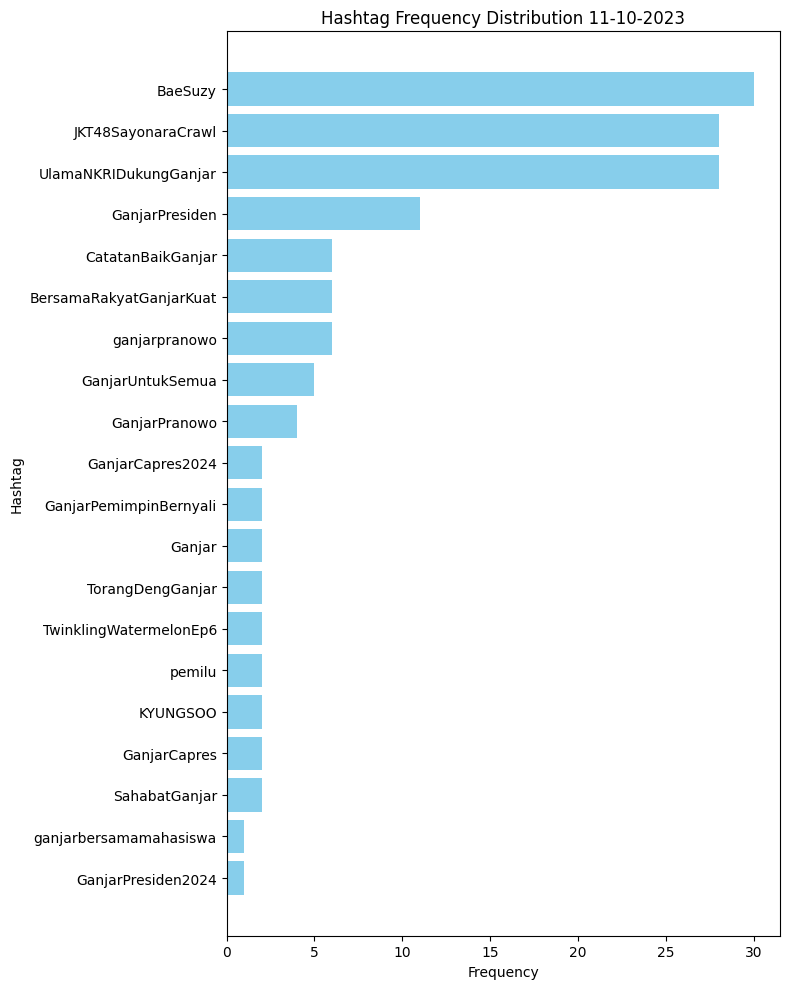

In [25]:
all_hashtags = [hashtag for hashtags in filtered_11['hashtags'] for hashtag in hashtags]

# Calculate hashtag frequencies
hashtag_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_counts.columns = ['Hashtag', 'Frequency']

# Sort by frequency in ascending order
sorted_hashtags = hashtag_counts.sort_values(by='Frequency', ascending=False)

hashtags = sorted_hashtags['Hashtag'].head(20)
frequencies = sorted_hashtags['Frequency'].head(20)


words = [hashtag[1:] for hashtag in hashtags]
# Reverse the order to display the most frequent hashtags at the top
words = words[::-1]
frequencies = frequencies[::-1]

# Create a vertical bar chart with hashtag names on the y-axis
plt.figure(figsize=(8, 10))  # Adjust the figsize to fit your preference
plt.barh(words, frequencies, color='skyblue')
plt.ylabel('Hashtag')
plt.xlabel('Frequency')
plt.title('Hashtag Frequency Distribution 11-10-2023')
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

In [26]:
filtered_11 = filtered_11[filtered_11['favorite_count']>5]

In [27]:
filtered_11 = filtered_11[['full_text','retweet_count','favorite_count','username','tweet_url','sentiment']]

In [28]:
filtered_11

,full_text,retweet_count,favorite_count,username,tweet_url,sentiment
735,@Dennysiregar7 @officialMKRI Hanya karena taku...,1,18,TaufikWaha1,https://twitter.com/TaufikWaha1/status/1712255...,positive
745,Siswa MTS NU meminta Ganjar menjadi bapak angk...,3,7,bahia84010,https://twitter.com/bahia84010/status/17122546...,positive
753,Kedatangan Ganjar disambut hangat oleh ulama d...,3,8,FGulfsa48256,https://twitter.com/FGulfsa48256/status/171225...,positive
757,KH Endang Adjidin menyambut hangat Ganjar di M...,3,7,FakhraFati99992,https://twitter.com/FakhraFati99992/status/171...,positive
759,"Ganjar menekankan, sikap patriotis dan nasiona...",3,7,BineshEmily,https://twitter.com/BineshEmily/status/1712254...,positive
761,"Di pusara makam Sukamanah, Ganjar memanjatkan ...",3,6,GulnazHazi843,https://twitter.com/GulnazHazi843/status/17122...,positive
762,Ganjar terpesona oleh Pedang Bambu bersejarah ...,3,10,EFaizza14615,https://twitter.com/EFaizza14615/status/171225...,positive
769,Ganjar berziarah ke makam pendiri pesantren Ci...,3,8,BDafinah42655,https://twitter.com/BDafinah42655/status/17122...,positive
772,KH Ubaidillah Ruhiat menyambut hangat Ganjar d...,2,6,DiyaFaahim87465,https://twitter.com/DiyaFaahim87465/status/171...,positive
782,Ganjar berziarah ke makam Abah Sepuh dan Abah ...,3,11,OvienovNat60645,https://twitter.com/OvienovNat60645/status/171...,positive


In [29]:
for text in filtered_11['full_text'][:17]:
  print(text)

@Dennysiregar7 @officialMKRI Hanya karena takut melihat Ganjar kalah oleh Prabowo kalian teriak teriak gawang konstitusi. Selama ini putusan MK tidak pernah memihak kepada rakyat kalian pada kemana?
Siswa MTS NU meminta Ganjar menjadi bapak angkat.   #UlamaNKRIDukungGanjar #JKT48SayonaraCrawl #BaeSuzy CONGRATULATIONS JIN Unpar Saw X Zionis see you in 2025 Kiai Thoifur Mahkamah Keluarga Puricas x Win https://t.co/vQQ9UYcjwe
Kedatangan Ganjar disambut hangat oleh ulama di Desa Pamijahan.   #UlamaNKRIDukungGanjar #JKT48SayonaraCrawl #BaeSuzy CONGRATULATIONS JIN Unpar Saw X Zionis see you in 2025 Kiai Thoifur Mahkamah Keluarga Puricas x Win https://t.co/IktZzl8oJU
KH Endang Adjidin menyambut hangat Ganjar di Makam Syekh Abdul Muhyi.   #UlamaNKRIDukungGanjar #JKT48SayonaraCrawl #BaeSuzy CONGRATULATIONS JIN Unpar Saw X Zionis see you in 2025 Kiai Thoifur Mahkamah Keluarga Puricas x Win https://t.co/1GXE3TLgBE
Ganjar menekankan, sikap patriotis dan nasionalis ulama harus diwariskan ke generas

**12-10-2023**

In [30]:
filtered_12 = df[df['created_at'] == '12-10-2023']

In [31]:
filtered_12['hashtags'] = filtered_12['full_text'].apply(extract_hashtags)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27788\3714062529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_12['hashtags'] = filtered_12['full_text'].apply(extract_hashtags)


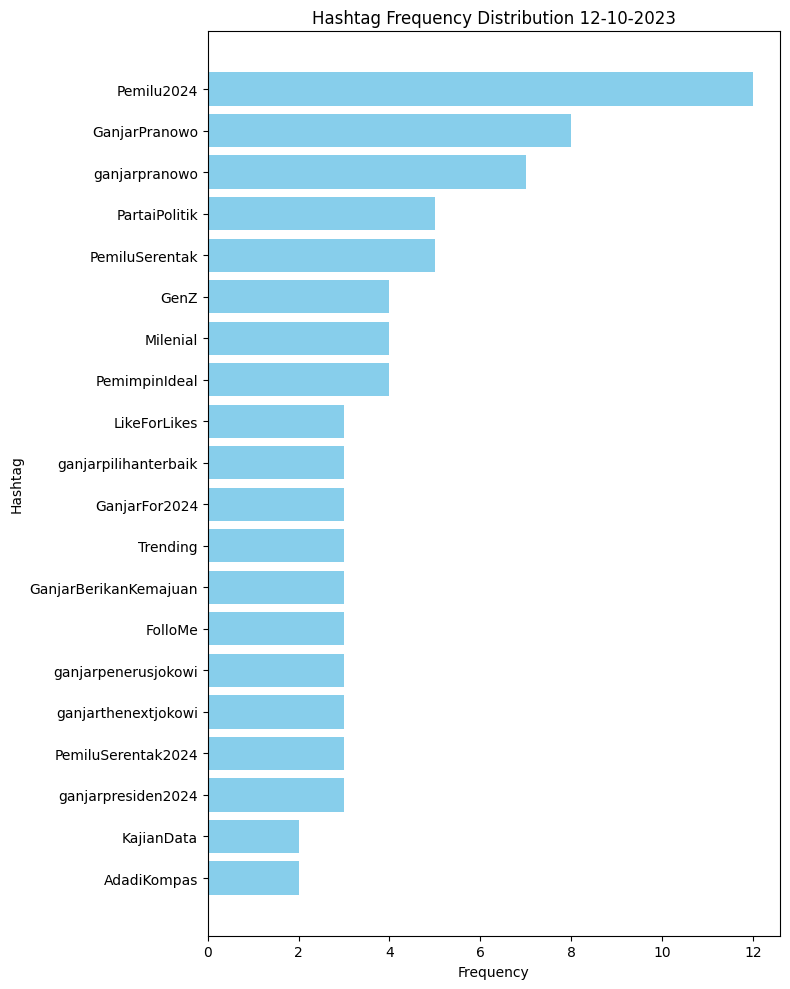

In [32]:
all_hashtags = [hashtag for hashtags in filtered_12['hashtags'] for hashtag in hashtags]

# Calculate hashtag frequencies
hashtag_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_counts.columns = ['Hashtag', 'Frequency']

# Sort by frequency in ascending order
sorted_hashtags = hashtag_counts.sort_values(by='Frequency', ascending=False)

hashtags = sorted_hashtags['Hashtag'].head(20)
frequencies = sorted_hashtags['Frequency'].head(20)


words = [hashtag[1:] for hashtag in hashtags]
# Reverse the order to display the most frequent hashtags at the top
words = words[::-1]
frequencies = frequencies[::-1]

# Create a vertical bar chart with hashtag names on the y-axis
plt.figure(figsize=(8, 10))  # Adjust the figsize to fit your preference
plt.barh(words, frequencies, color='skyblue')
plt.ylabel('Hashtag')
plt.xlabel('Frequency')
plt.title('Hashtag Frequency Distribution 12-10-2023')
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

In [33]:
filtered_12 = filtered_12[filtered_12['favorite_count']>3]

In [34]:
filtered_12 = filtered_12[['full_text','retweet_count','favorite_count','username','tweet_url','sentiment']]

In [35]:
filtered_12

,full_text,retweet_count,favorite_count,username,tweet_url,sentiment
1036,@_BungHerwin @ganjarpranowo @jokowi @PDI_Perju...,0,4,KangHendro2,https://twitter.com/KangHendro2/status/1712619...,positive
1044,@gibran_tweet @karep_q Saya gak ikut mendukung...,2,14,Megatop99,https://twitter.com/Megatop99/status/171261882...,negative
1051,@__AnakKolong @jokowi Kita sedang di hadapkan ...,0,8,KastantoTohirin,https://twitter.com/KastantoTohirin/status/171...,positive
1059,"Ganjar Pranowo beri kuliah umum di Unpar, Ganj...",11,14,riegosee,https://twitter.com/riegosee/status/1712618276...,positive
1075,"Saat memimpin di Jateng, Ganjar Pranowo telah ...",45,55,denni_sauya,https://twitter.com/denni_sauya/status/1712617...,positive
1076,Gubernur Lemhannas Andi Widjajanto resmi berga...,30,47,RomitsuT,https://twitter.com/RomitsuT/status/1712617829...,positive
1085,@CNNIndonesia gausah malu2 survei berbayar itu...,0,5,Minumyakulttiap,https://twitter.com/Minumyakulttiap/status/171...,neutral
1099,@dewiirawan13 Selama Jokowi ga pindah server g...,0,5,nana140920,https://twitter.com/nana140920/status/17126168...,neutral
1112,Ganjar Pranowo berbicara komitmennya untuk men...,22,38,triwul82,https://twitter.com/triwul82/status/1712616237...,positive
1120,"Rekam jejak pak Ganjar.. Nanti, Indonesia pun ...",16,26,SahabatSaber,https://twitter.com/SahabatSaber/status/171261...,positive


In [36]:
for text in filtered_11['full_text'][:17]:
  print(text)

@Dennysiregar7 @officialMKRI Hanya karena takut melihat Ganjar kalah oleh Prabowo kalian teriak teriak gawang konstitusi. Selama ini putusan MK tidak pernah memihak kepada rakyat kalian pada kemana?
Siswa MTS NU meminta Ganjar menjadi bapak angkat.   #UlamaNKRIDukungGanjar #JKT48SayonaraCrawl #BaeSuzy CONGRATULATIONS JIN Unpar Saw X Zionis see you in 2025 Kiai Thoifur Mahkamah Keluarga Puricas x Win https://t.co/vQQ9UYcjwe
Kedatangan Ganjar disambut hangat oleh ulama di Desa Pamijahan.   #UlamaNKRIDukungGanjar #JKT48SayonaraCrawl #BaeSuzy CONGRATULATIONS JIN Unpar Saw X Zionis see you in 2025 Kiai Thoifur Mahkamah Keluarga Puricas x Win https://t.co/IktZzl8oJU
KH Endang Adjidin menyambut hangat Ganjar di Makam Syekh Abdul Muhyi.   #UlamaNKRIDukungGanjar #JKT48SayonaraCrawl #BaeSuzy CONGRATULATIONS JIN Unpar Saw X Zionis see you in 2025 Kiai Thoifur Mahkamah Keluarga Puricas x Win https://t.co/1GXE3TLgBE
Ganjar menekankan, sikap patriotis dan nasionalis ulama harus diwariskan ke generas

**13-10-2023**

In [37]:
filtered_13 = df[df['created_at'] == '13-10-2023']

In [38]:
filtered_13['hashtags'] = filtered_13['full_text'].apply(extract_hashtags)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27788\3224427828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_13['hashtags'] = filtered_13['full_text'].apply(extract_hashtags)


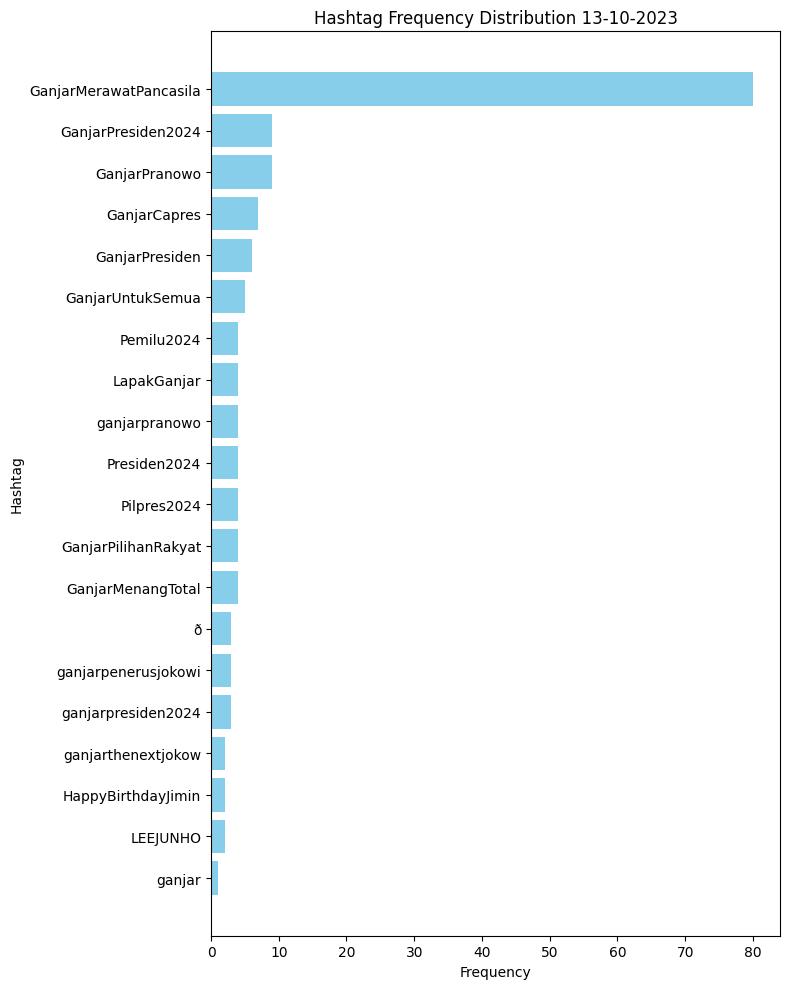

In [39]:
all_hashtags = [hashtag for hashtags in filtered_13['hashtags'] for hashtag in hashtags]

# Calculate hashtag frequencies
hashtag_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_counts.columns = ['Hashtag', 'Frequency']

# Sort by frequency in ascending order
sorted_hashtags = hashtag_counts.sort_values(by='Frequency', ascending=False)

hashtags = sorted_hashtags['Hashtag'].head(20)
frequencies = sorted_hashtags['Frequency'].head(20)


words = [hashtag[1:] for hashtag in hashtags]
# Reverse the order to display the most frequent hashtags at the top
words = words[::-1]
frequencies = frequencies[::-1]

# Create a vertical bar chart with hashtag names on the y-axis
plt.figure(figsize=(8, 10))  # Adjust the figsize to fit your preference
plt.barh(words, frequencies, color='skyblue')
plt.ylabel('Hashtag')
plt.xlabel('Frequency')
plt.title('Hashtag Frequency Distribution 13-10-2023')
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

In [40]:
filtered_13 = filtered_13[filtered_13['favorite_count']>5]

In [41]:
filtered_13 = filtered_13[['full_text','retweet_count','favorite_count','username','tweet_url','sentiment']]

In [42]:
filtered_13

,full_text,retweet_count,favorite_count,username,tweet_url,sentiment
1396,@datuakrajoangek Biarpun Jokowi jadi jurkamnas...,0,15,Bud_Cavalera,https://twitter.com/Bud_Cavalera/status/171298...,positive
1431,"@__AnakKolong @jokowi Pada prinsipnya , sekali...",5,55,SimanjuntakElly,https://twitter.com/SimanjuntakElly/status/171...,positive
1478,Kandidat terkuat sbg cawapres GanjarðŸ’ªâœ… |...,8,15,mila_syam67,https://twitter.com/mila_syam67/status/1712979...,neutral
1499,Momen Pak Ganjar Pranowo sowan dan bersilatura...,6,14,JesicaRahmadina,https://twitter.com/JesicaRahmadina/status/171...,neutral
1500,Pesan yang dititipkan oleh Paskalis Ronaldo sa...,57,266,Paltiwest,https://twitter.com/Paltiwest/status/171297884...,positive
1532,"@aan_muba Untung pak Ganjar nih hobbynya olga,...",4,12,SahabatSaber,https://twitter.com/SahabatSaber/status/171297...,neutral
1535,@VIVAcoid Viralnya video Ganjar menelpon ke re...,2,9,anwarsupeno,https://twitter.com/anwarsupeno/status/1712977...,positive
1585,SETUJUUU dengan apa yg disampaikan Ganjar saat...,8,11,coema_coemi,https://twitter.com/coema_coemi/status/1712976...,positive
1596,Ganjar Pranowo dan Jokowi sama2 PRODUK POLITIK...,98,410,Miduk17,https://twitter.com/Miduk17/status/17129759420...,positive
1604,Pemberantasan korupsi menjadi prioritas bagi @...,8,10,coema_coemi,https://twitter.com/coema_coemi/status/1712975...,positive


In [43]:
for text in filtered_13['full_text'][:17]:
  print(text)

@datuakrajoangek Biarpun Jokowi jadi jurkamnas Prabowo Saya tetap pilih Ganjar.
@__AnakKolong @jokowi Pada prinsipnya , sekalipun Jokowi yang menjadi wakil Prabowo , pilihan kami  SEKALI GANJAR TETAP GANJAR.
Kandidat terkuat sbg cawapres GanjarðŸ’ªâœ…  || PAMALI DUSUN POCONG Gibran UIN Jambi Tidur Pasumi Jam 3 Daddies Arhan Gaza Kairi Israel Nanami Ashel Ngejar Kwangso Geek || https://t.co/5cgnsxzsWX
Momen Pak Ganjar Pranowo sowan dan bersilaturahmi ke Pondok Pesantren Al Hikam Kota Malang, yang didirikan oleh almarhum KH Hasyim Muzadi. @ganjarpranowo nampak ngobrol santai dengan Pengasuh Pondok Pesantren Al Hikam, KH. Muhammad Nafi sambil menikmati hidangan buah durian. https://t.co/tLqm27AWcx
Pesan yang dititipkan oleh Paskalis Ronaldo saat Ganjar Pranowo berkunjung ke Keuskupan Malang..  Ganjar satu-satunya capres yang tidak disusupi pendukung intoleransi.. https://t.co/ISizYOCVDj
@aan_muba Untung pak Ganjar nih hobbynya olga, kalo g tambah nduuuttt. Rezeki silaturahmi salah satunya

**14-10-2023**

In [44]:
filtered_14 = df[df['created_at'] == '14-10-2023']

In [45]:
filtered_14['hashtags'] = filtered_14['full_text'].apply(extract_hashtags)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27788\974342060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_14['hashtags'] = filtered_14['full_text'].apply(extract_hashtags)


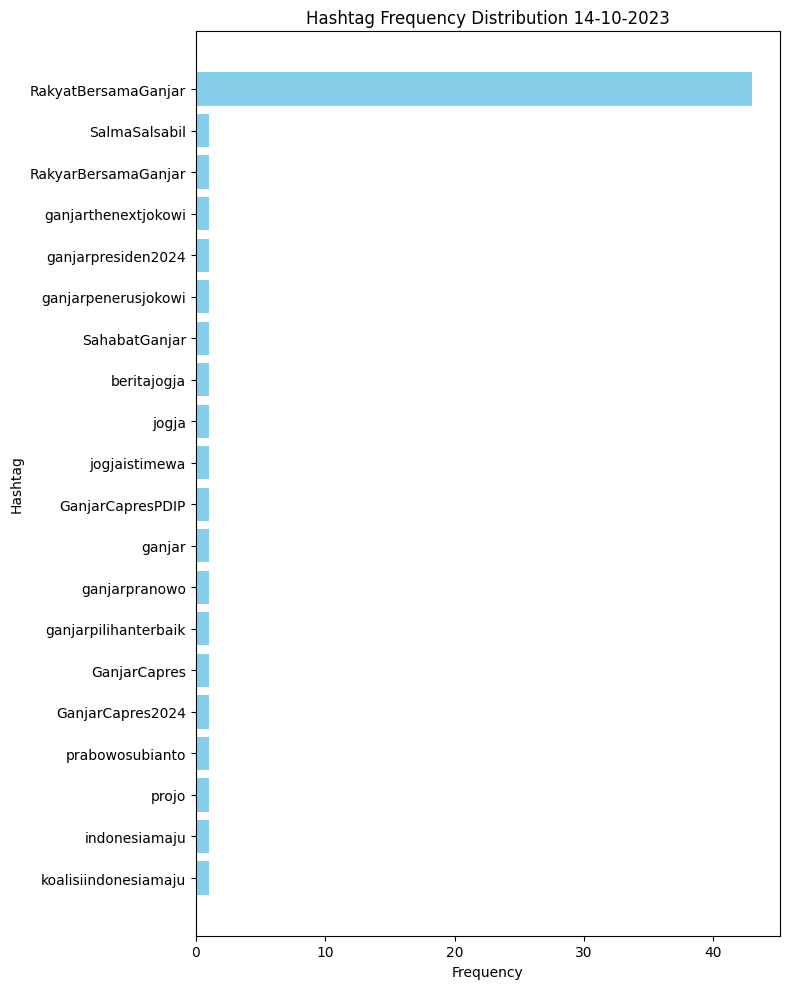

In [46]:
all_hashtags = [hashtag for hashtags in filtered_14['hashtags'] for hashtag in hashtags]

# Calculate hashtag frequencies
hashtag_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_counts.columns = ['Hashtag', 'Frequency']

# Sort by frequency in ascending order
sorted_hashtags = hashtag_counts.sort_values(by='Frequency', ascending=False)

hashtags = sorted_hashtags['Hashtag'].head(20)
frequencies = sorted_hashtags['Frequency'].head(20)


words = [hashtag[1:] for hashtag in hashtags]
# Reverse the order to display the most frequent hashtags at the top
words = words[::-1]
frequencies = frequencies[::-1]

# Create a vertical bar chart with hashtag names on the y-axis
plt.figure(figsize=(8, 10))  # Adjust the figsize to fit your preference
plt.barh(words, frequencies, color='skyblue')
plt.ylabel('Hashtag')
plt.xlabel('Frequency')
plt.title('Hashtag Frequency Distribution 14-10-2023')
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

In [47]:
filtered_14 = filtered_14[filtered_14['favorite_count']>5]

In [48]:
filtered_14 = filtered_14[['full_text','retweet_count','favorite_count','username','tweet_url','sentiment']]

In [49]:
filtered_14

,full_text,retweet_count,favorite_count,username,tweet_url,sentiment
1747,"@KakekHalal Pendukung Ganjar pada ngamuk, Kare...",0,9,loketpaytren2,https://twitter.com/loketpaytren2/status/17133...,neutral
1775,Bakal Calon Presiden (Bacapres) Ganjar Pranowo...,18,20,Torrez_20_06,https://twitter.com/Torrez_20_06/status/171334...,positive
1800,@Jayabay19479190 @ganjarpranowo @PDI_Perjuanga...,1,6,HeruPraset77452,https://twitter.com/HeruPraset77452/status/171...,negative
1803,"Bertemu Mahasiswa dan Petani se-Sumba, Ganjar ...",3,49,KompasTV,https://twitter.com/KompasTV/status/1713341708...,neutral
1805,"Prabowo-Ganjar bersaing, Anies Anjlok. || Mr....",10,24,elza_fahria,https://twitter.com/elza_fahria/status/1713341...,neutral
1860,âœ…âœ…âœ…âœ…âœ…âœ…âœ… JELAS â€¼ï¸â€¼ï¸â€¼ï¸...,48,94,RstmBcl,https://twitter.com/RstmBcl/status/17133401667...,positive
1870,"Selamat pagi.. Berasal dari rakyat, bekerja un...",16,47,SahabatSaber,https://twitter.com/SahabatSaber/status/171333...,positive
1877,@liputan6dotcom Bukanya cuekin Ganjar tp emg G...,2,9,AmirilKing,https://twitter.com/AmirilKing/status/17133395...,negative
1878,@ganjarpranowo Semua harus di beri ruang pak G...,4,63,Eil_Thia,https://twitter.com/Eil_Thia/status/1713339524...,positive
1907,@Gus_Raharjo @ganjarpranowo Jelas kita dukung ...,2,12,ReneeEmbun,https://twitter.com/ReneeEmbun/status/17133387...,positive


In [50]:
for text in filtered_14['full_text'][:17]:
  print(text)

@KakekHalal Pendukung Ganjar pada ngamuk, Karena PROJO dukung Prabowo...ðŸ¤£ðŸ¤£silahkan baku hantam...
Bakal Calon Presiden (Bacapres) Ganjar Pranowo menghadiri diskusi yang digelar Forum Akademisi Jaringan Indonesia (JARI), Ganjar memaparkan konsep dari demografi Indonesia, pendidikan, kesehatan, pangan hingga penegakan hukum.  ___ CCTV Mr.P Dita Yuyun #SalmaSalsabil Sniper https://t.co/zOQjApUJew
@Jayabay19479190 @ganjarpranowo @PDI_Perjuangan @jokowi NGIMPI.SAYA JAWA TENGAH OGAH MILIH GANJAR.CUKUP JADI GUB JATENG KAMU PADA MISKIN
Bertemu Mahasiswa dan Petani se-Sumba, Ganjar Pranowo Bicara Kedaulatan Pangan https://t.co/beIyJNlCrx
Prabowo-Ganjar bersaing, Anies Anjlok.  || Mr. P JOKOWI ENJOY YOU DAY WITH REBECCA CCTV Sosis Tommy Sniper KIM SEOKJIN IS COMING Yuyun Malmingan Geek Rizky Chanyeol in House Husband Olive || https://t.co/BwL1kYzp3a
âœ…âœ…âœ…âœ…âœ…âœ…âœ…  JELAS â€¼ï¸â€¼ï¸â€¼ï¸ Bowo Masa Lalu GANJAR MASA DEPAN ðŸ¤ŸðŸ¤ŸðŸ¤Ÿ  #RakyatBersamaGanjar   ðŸ‡²ðŸ‡¨ðŸ‡²ðŸ‡¨ðŸ‡²ðŸ‡¨

**15-10-2023**

In [51]:
filtered_15 = df[df['created_at'] == '15-10-2023']

In [52]:
filtered_15['hashtags'] = filtered_15['full_text'].apply(extract_hashtags)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27788\232104871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_15['hashtags'] = filtered_15['full_text'].apply(extract_hashtags)


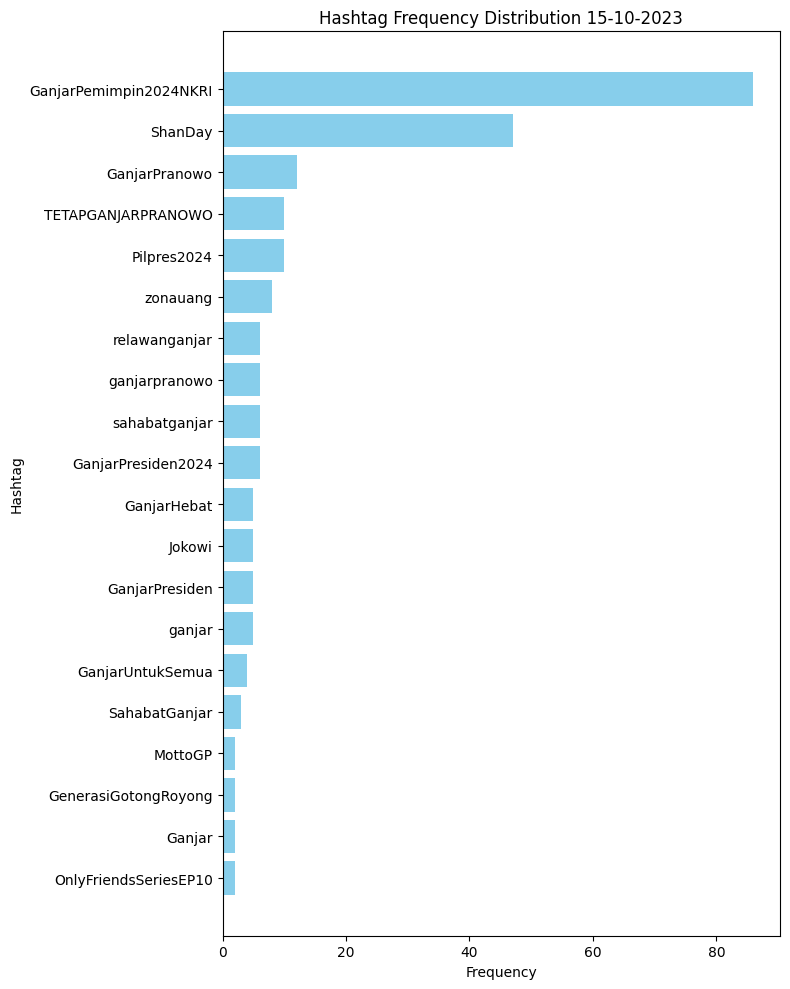

In [53]:
all_hashtags = [hashtag for hashtags in filtered_15['hashtags'] for hashtag in hashtags]

# Calculate hashtag frequencies
hashtag_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_counts.columns = ['Hashtag', 'Frequency']

# Sort by frequency in ascending order
sorted_hashtags = hashtag_counts.sort_values(by='Frequency', ascending=False)

hashtags = sorted_hashtags['Hashtag'].head(20)
frequencies = sorted_hashtags['Frequency'].head(20)


words = [hashtag[1:] for hashtag in hashtags]
# Reverse the order to display the most frequent hashtags at the top
words = words[::-1]
frequencies = frequencies[::-1]

# Create a vertical bar chart with hashtag names on the y-axis
plt.figure(figsize=(8, 10))  # Adjust the figsize to fit your preference
plt.barh(words, frequencies, color='skyblue')
plt.ylabel('Hashtag')
plt.xlabel('Frequency')
plt.title('Hashtag Frequency Distribution 15-10-2023')
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

In [54]:
filtered_15 = filtered_15[filtered_15['favorite_count']>0]

In [55]:
filtered_15 = filtered_15[['full_text','retweet_count','favorite_count','username','tweet_url','sentiment']]

In [56]:
filtered_15

,full_text,retweet_count,favorite_count,username,tweet_url,sentiment
2035,@strike_bravo_b At very least kalo amit amit G...,0,2,FatEmolga,https://twitter.com/FatEmolga/status/171341778...,positive
2045,Keluarga Besar Majelis talim Hidayatul Mubarok...,0,1,Varensia131,https://twitter.com/Varensia131/status/1713417...,positive
2064,Siang Lurrr Met Hari Minggu... Dari ketiga B...,2,2,jijindut,https://twitter.com/jijindut/status/1713417320...,positive
2067,Ganjar pranowo sebut banyak mendapatkan ilmu b...,0,1,PejuangGanjar,https://twitter.com/PejuangGanjar/status/17134...,positive
2078,"Ganjar Pranowo penerus Presiden Jokowi, rakyat...",0,1,alshasaviraa,https://twitter.com/alshasaviraa/status/171341...,positive
...,...,...,...,...,...,...
2487,@ganjarpranowo Pak Ganjar tokoh pemersatu bang...,1,1,hasanundlup,https://twitter.com/hasanundlup/status/1713410...,positive
2488,@gus_dibyo tebar kebaikan terus pendukung Ganj...,0,1,Gingsul97280757,https://twitter.com/Gingsul97280757/status/171...,positive
2489,Sapa karyawan Maspion Ganjar dengarkan Aspiras...,0,1,RemajaSosmed1,https://twitter.com/RemajaSosmed1/status/17134...,positive
2494,@IDNTimes Sukses terus bapak Ganjar Pranowo ðŸ...,0,1,Vinaaa21_,https://twitter.com/Vinaaa21_/status/171341026...,positive


In [57]:
for text in filtered_15['full_text'][:106]:
  print(text)

@strike_bravo_b At very least kalo amit amit Ganjar menang pilpres bakal beda ama era Jokeswhy whether its for better or for worse
Keluarga Besar Majelis talim Hidayatul Mubarokah Kec. Rangkas Bitung Kab. Lebak, Mendukung Penuh Bapak Ganjar Pranowo Sebagai Capres RI 2024-2029. https://t.co/1Yi4yI64VX
Siang Lurrr Met Hari Minggu...   Dari ketiga Bacapres ini ada yang  - BAIK - TIDAK BAIK dan  - PURA PURA BAIK  Yang setuju Bapak Rambut Putih @ganjarpranowo Bacapres yang BAIK monggo RTL ðŸ˜ Karena Rakyat Bersama Ganjar âˆš  Salam Metal ðŸ¤Ÿ Yang Benar Pilih Ganjar https://t.co/Ben9FfPNth
Ganjar pranowo sebut banyak mendapatkan ilmu berharga yang dapat membawa perubahan positif  #GanjarPemimpin2024NKRI https://t.co/N8ky6kiJT3
Ganjar Pranowo penerus Presiden Jokowi, rakyat mendukung Ganjar Pranowo   #GanjarPranowo #Jokowi #Pilpres2024 https://t.co/4dJmG7W1sM
2024 saatnya Ganjar Pranowo meneruskan  Presiden Jokowi menuju Indonesia Emas 2045   #GanjarPranowo #Jokowi #Pilpres2024 https://t.co

# **Tweet Terbanyak**

In [58]:
most_tweet = df[['quote_count','username']]

In [59]:
most_tweet = most_tweet.nlargest(5, 'quote_count')

In [60]:
most_tweet

,quote_count,username
1171,22,CNNIndonesia
1293,15,tvOneNews
1228,7,rmol_id
858,5,liputan6dotcom
1277,5,ganjarist_satu


# **ReTweet Terbanyak**

In [61]:
most_retweet = df[['retweet_count','username']]

In [62]:
most_retweet = most_retweet.nlargest(6, 'retweet_count')

In [63]:
most_retweet

,retweet_count,username
213,1053,GMJakarta
476,1046,GMJakarta
1277,138,ganjarist_satu
1596,98,Miduk17
263,78,aan_muba
359,65,RstmBcl


# PALING BANYAK DI MENTION

In [64]:
import re
def extract_mentions(text):
    # Define a regular expression pattern to match hashtags
    mentions_pattern = r'@\w+'
    
    # Use the findall method to extract all hashtags from the text
    hashtags = re.findall(mentions_pattern, text)
    
    return hashtags

In [65]:
df['mentions'] = df['full_text'].apply(extract_mentions)

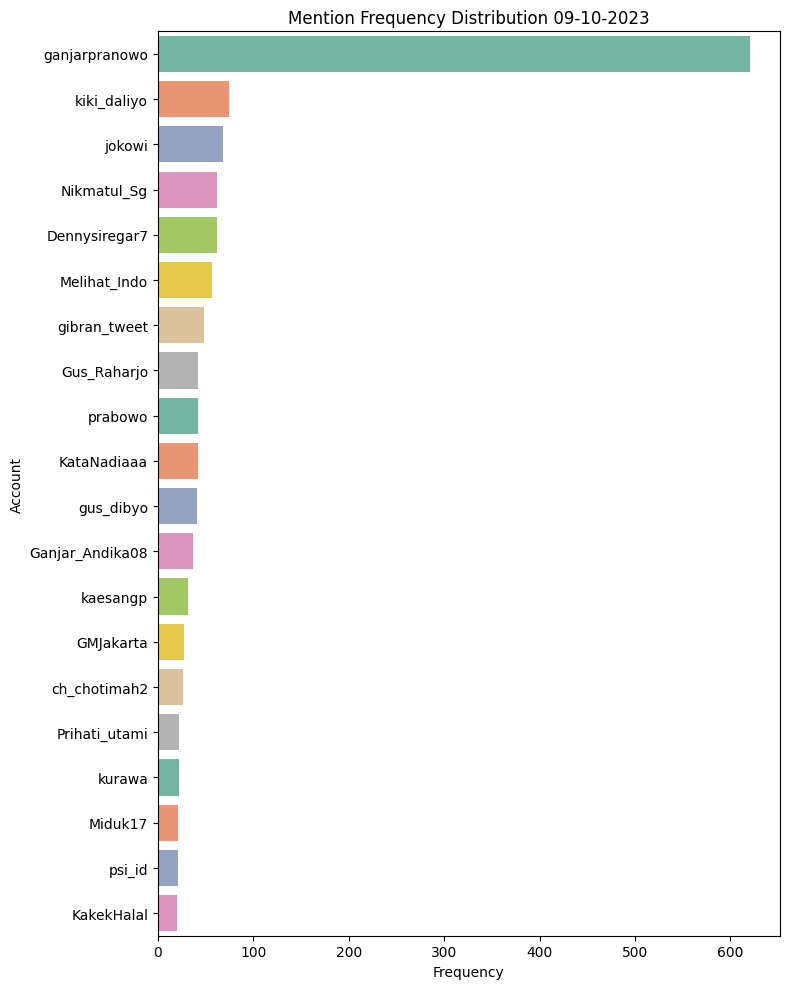

In [66]:
all_mentions = [mention for mentions in df['mentions'] for mention in mentions]

# Calculate hashtag frequencies
mentions_counts = pd.Series(all_mentions).value_counts().reset_index()
mentions_counts.columns = ['Mention', 'Frequency']

# Sort by frequency in ascending order
sorted_mentions = mentions_counts.sort_values(by='Frequency', ascending=False)

mentions = sorted_mentions['Mention'].head(20)
frequencies = sorted_mentions['Frequency'].head(20)


words = [mention[1:] for mention in mentions]
# Reverse the order to display the most frequent hashtags at the top
words = words[::1]
frequencies = frequencies[::1]

# Set the color palette to "Set2"
sns.set_palette("Set2")

# Create a horizontal bar chart with Seaborn
plt.figure(figsize=(8, 10))
sns.barplot(x=frequencies, y=words, palette="Set2")
plt.ylabel('Account')
plt.xlabel('Frequency')
plt.title('Mention Frequency Distribution 09-10-2023')
plt.tight_layout()
plt.show()

# TOP HASTAG

In [67]:
df['hashtags'] = df['full_text'].apply(extract_hashtags)

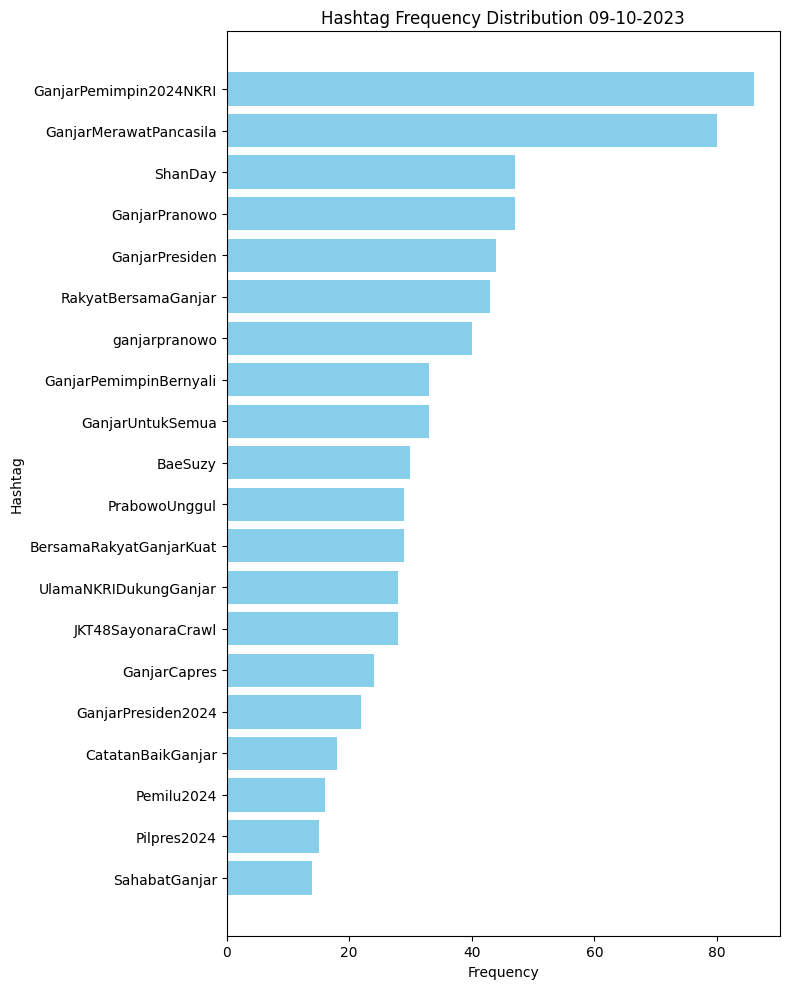

In [68]:
all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]

# Calculate hashtag frequencies
hashtag_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_counts.columns = ['Hashtag', 'Frequency']

# Sort by frequency in ascending order
sorted_hashtags = hashtag_counts.sort_values(by='Frequency', ascending=False)

hashtags = sorted_hashtags['Hashtag'].head(20)
frequencies = sorted_hashtags['Frequency'].head(20)


words = [hashtag[1:] for hashtag in hashtags]
# Reverse the order to display the most frequent hashtags at the top
words = words[::-1]
frequencies = frequencies[::-1]

# Create a vertical bar chart with hashtag names on the y-axis
plt.figure(figsize=(8, 10))  # Adjust the figsize to fit your preference
plt.barh(words, frequencies, color='skyblue')
plt.ylabel('Hashtag')
plt.xlabel('Frequency')
plt.title('Hashtag Frequency Distribution 09-10-2023')
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

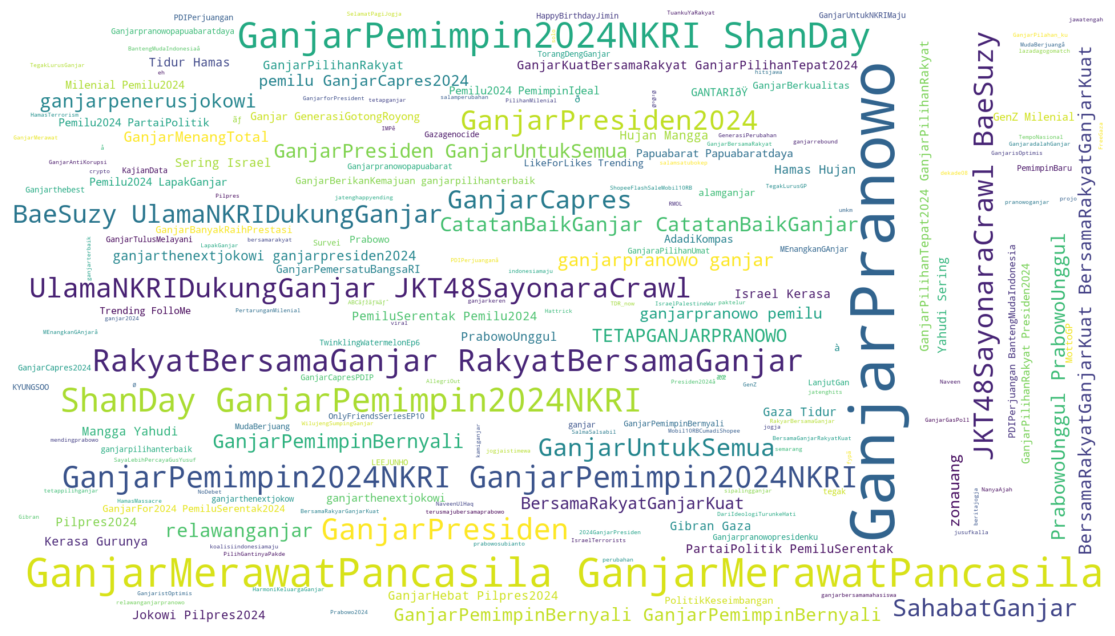

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all hashtags into a single string
all_hashtags = ' '.join(hashtag for hashtags in df['hashtags'] for hashtag in hashtags)

# Generate a word cloud
wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(all_hashtags)

# Display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **HATE SPEECH ACCOUNT**

In [70]:
hate_speech = df[df['sentiment'] =="negative"]

In [71]:
hate_speech

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,sentiment,mentions,hashtags
22,09-10-2023,1.710000e+18,@Iam_Nobody_1145 @omarghazyf @BosPurwa @aniesb...,0,1,0,0,in,7.448589e+07,1.710000e+18,ibnoe45,https://twitter.com/ibnoe45/status/17115305250...,negative,"[@Iam_Nobody_1145, @omarghazyf, @BosPurwa, @an...",[]
25,09-10-2023,1.710000e+18,@andre_rosiade Putaran kedua jgn sampe pkb ke ...,0,0,0,0,in,3.658387e+09,1.710000e+18,nurhadihoja4072,https://twitter.com/nurhadihoja4072/status/171...,negative,[@andre_rosiade],[]
28,09-10-2023,1.710000e+18,@tempodotco Bentuk politik kotor y d jalankan ...,0,0,0,0,in,1.640000e+18,1.710000e+18,rudis84,https://twitter.com/rudis84/status/17115302961...,negative,[@tempodotco],[]
40,09-10-2023,1.710000e+18,@KakekHalal @kaesangp @gibran_tweet Kalian aja...,0,0,0,0,in,1.610000e+18,1.710000e+18,laodemahmud5,https://twitter.com/laodemahmud5/status/171152...,negative,"[@KakekHalal, @kaesangp, @gibran_tweet]",[]
46,09-10-2023,1.710000e+18,@Miduk17 Mainannya masih intoleranâ€¦radikal r...,0,0,0,0,in,1.450000e+18,1.710000e+18,Soerydi2,https://twitter.com/Soerydi2/status/1711528571...,negative,[@Miduk17],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,15-10-2023,1.710000e+18,"@MRahayuna @PutraBachtiar9 @ekowboy2 Hahahah, ...",0,2,0,0,in,1.580000e+18,1.710000e+18,bocahedewe43,https://twitter.com/bocahedewe43/status/171341...,negative,"[@MRahayuna, @PutraBachtiar9, @ekowboy2]",[]
2372,15-10-2023,1.710000e+18,@KrisyantoOni Anies penggemar nge lem dan nge ...,0,0,0,0,in,9.904727e+07,1.710000e+18,njeplak_disik,https://twitter.com/njeplak_disik/status/17134...,negative,[@KrisyantoOni],[]
2416,15-10-2023,1.710000e+18,@tvOneNews Ganjar..? https://t.co/rvGxeBDJrl s...,0,0,0,0,in,5.671330e+08,1.710000e+18,asasfuro,https://twitter.com/asasfuro/status/1713411668...,negative,[@tvOneNews],[]
2478,15-10-2023,1.710000e+18,@MaliminRinaldi @van_all_ @BangEdiii @ganjarpr...,0,1,0,0,in,1.190357e+08,1.710000e+18,YGels,https://twitter.com/YGels/status/1713410616541...,negative,"[@MaliminRinaldi, @van_all_, @BangEdiii, @ganj...",[]


# **SNA**

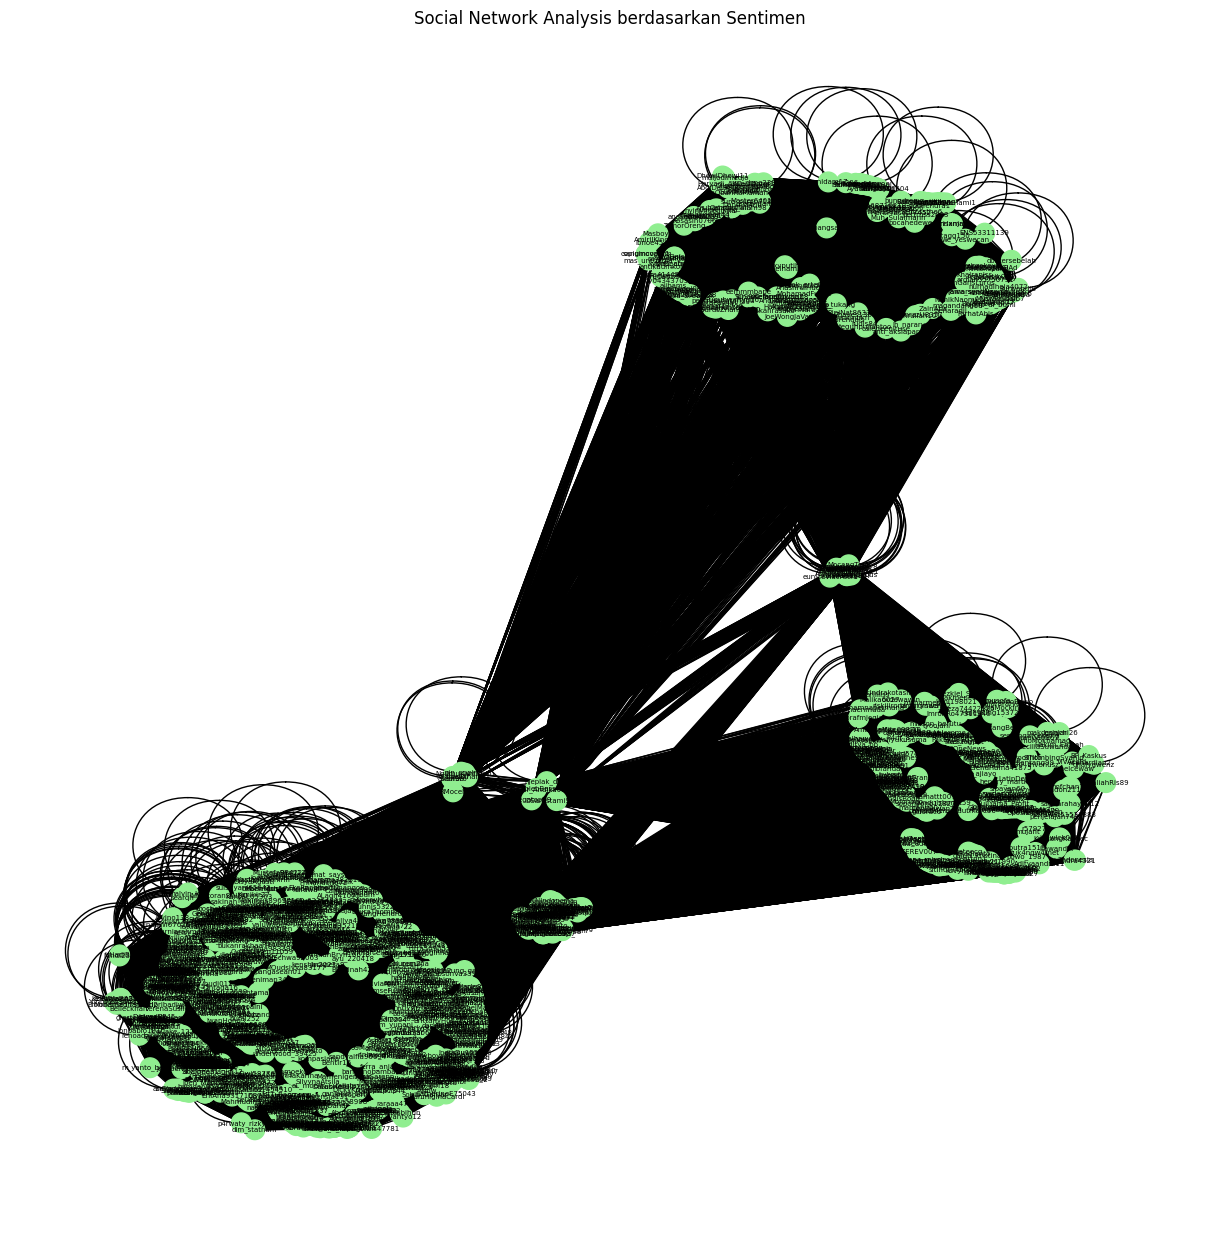

In [72]:
import networkx as nx

# Membuat grafik
G = nx.Graph()

# Menambahkan node (pengguna) ke grafik berdasarkan sentimen
for index, row in df.iterrows():
    G.add_node(row['username'], sentiment=row['sentiment'])

# Menghubungkan pengguna yang berinteraksi dalam sentimen yang sama
for index1, row1 in df.iterrows():
    for index2, row2 in df.iterrows():
        if index1 != index2 and row1['sentiment'] == row2['sentiment']:
            G.add_edge(row1['username'], row2['username'])

# Mengatur tampilan grafik
pos = nx.spring_layout(G)  # Anda dapat memilih layout yang sesuai
node_color = ['lightblue' if sentiment == 'Positive' else 'lightcoral' if sentiment == 'Negative' else 'lightgreen' for sentiment in nx.get_node_attributes(G, 'sentiment').values()]

# Menggambar grafik
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_color, font_size=5, font_color='k')
plt.title('Social Network Analysis berdasarkan Sentimen')
plt.show()